In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## 1- Loading the Dataset

In [15]:
df_surtidores = pd.read_csv("precios-en-surtidor-resolucin-3142016.csv")
df_surtidores['indice_tiempo']= pd.to_datetime(df_surtidores['indice_tiempo']).dt.to_period('M')

df_surtidores= df_surtidores.drop(['empresa','direccion','cuit','idempresa','producto','tipohorario','longitud','geojson','latitud','empresabandera'],axis=1)
df_surtidores.shape


(36628, 9)

In [45]:
df_tipo_de_cambio = pd.read_csv("tipos-de-cambio-historicos.csv")
df_tipo_de_cambio['indice_tiempo'] = pd.to_datetime(df_tipo_de_cambio['indice_tiempo']).dt.to_period('M')
df_tipo_de_cambio['indice_tiempo'] = df_tipo_de_cambio['indice_tiempo']
df_tipo_de_cambio.shape
df_tipo_de_cambio.tail()

,indice_tiempo,dolar_tipo_unico,dolar_finan_esp_compra,dolar_finan_esp_venta,dolar_financiero_compra,dolar_financiero_venta,dolar_libre_compra,dolar_libre_venta,dolar_oficial_compra,dolar_oficial_venta,dolar_estadounidense,dolar_referencia_com_3500
19805,2024-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,858.0001,857.4167
19806,2024-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,858.0001,857.4167
19807,2024-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,858.0001,857.4167
19808,2024-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,858.0001,857.4167
19809,2024-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,858.0001,857.4167


In [26]:
df_filtro_fecha = df_tipo_de_cambio[df_tipo_de_cambio['dolar_estadounidense']>0]
df_filtro_fecha['resta_est_3500']=abs(df_filtro_fecha['dolar_estadounidense']-df_filtro_fecha['dolar_referencia_com_3500'])
df_tipo_de_cambio_dolar = df_filtro_fecha[['indice_tiempo','dolar_estadounidense']]
df_tipo_de_cambio_dolar= df_tipo_de_cambio_dolar.groupby('indice_tiempo',as_index=False).mean()
df_tipo_de_cambio_dolar.shape

/tmp/ipykernel_137463/3441522598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtro_fecha['resta_est_3500']=abs(df_filtro_fecha['dolar_estadounidense']-df_filtro_fecha['dolar_referencia_com_3500'])


(387, 2)

In [27]:
df_surtidores_dolar = pd.merge(df_tipo_de_cambio_dolar,df_surtidores,how='inner')
#df_surtidores_dolar.sort_values('dolar_estadounidense',ascending=False)
df_surtidores_dolar.sort_index()
df_surtidores_dolar

,indice_tiempo,dolar_estadounidense,localidad,provincia,region,idproducto,idtipohorario,precio,fecha_vigencia,idempresabandera
0,2016-06,14.150933,CUTRAL CO,NEUQUEN,PATAGONIA,6,2,9.90,2016-06-30 00:00:00,1
1,2016-06,14.150933,CUTRAL CO,NEUQUEN,PATAGONIA,6,3,9.90,2016-06-30 00:00:00,1
2,2016-06,14.150933,ROJAS,BUENOS AIRES,PAMPEANA,6,2,11.94,2016-06-01 11:58:00,2
3,2016-06,14.150933,ROJAS,BUENOS AIRES,PAMPEANA,6,3,11.94,2016-06-01 11:58:00,2
4,2016-08,14.835613,BANDA DEL RIO SALI,TUCUMAN,CUYO,6,2,10.68,2016-08-01 09:42:00,2
...,...,...,...,...,...,...,...,...,...,...
5918,2024-03,850.758158,VILLAGUAY,ENTRE RIOS,NaN,3,3,1085.00,2024-03-09 13:09:00,1
5919,2024-03,850.758158,VILLAGUAY,ENTRE RIOS,NaN,2,2,895.00,2024-03-09 13:09:00,1
5920,2024-03,850.758158,VILLAGUAY,ENTRE RIOS,NaN,2,3,895.00,2024-03-09 13:09:00,1
5921,2024-03,850.758158,MAR DEL PLATA,BUENOS AIRES,PAMPEANA,6,2,549.00,2024-03-07 14:00:00,28


In [7]:
df_surtidores_dolar.head()

,indice_tiempo,dolar_estadounidense,localidad,provincia,region,idproducto,idtipohorario,precio,fecha_vigencia,idempresabandera
0,2016-06,14.150933,CUTRAL CO,NEUQUEN,PATAGONIA,6,2,9.90,2016-06-30 00:00:00,1
1,2016-06,14.150933,CUTRAL CO,NEUQUEN,PATAGONIA,6,3,9.90,2016-06-30 00:00:00,1
2,2016-06,14.150933,ROJAS,BUENOS AIRES,PAMPEANA,6,2,11.94,2016-06-01 11:58:00,2
3,2016-06,14.150933,ROJAS,BUENOS AIRES,PAMPEANA,6,3,11.94,2016-06-01 11:58:00,2
4,2016-08,14.835613,BANDA DEL RIO SALI,TUCUMAN,CUYO,6,2,10.68,2016-08-01 09:42:00,2


## 2 - Data Preparation

In [8]:
df_test =df_surtidores_dolar.groupby(['provincia'])[['indice_tiempo','dolar_estadounidense','precio']].mean()

df_test

,indice_tiempo,dolar_estadounidense,precio
provincia,,,
BUENOS AIRES,2022-08,498.178541,443.142417
CAPITAL FEDERAL,2022-11,519.606328,475.162610
CATAMARCA,2023-03,636.874716,317.911429
CHACO,2022-07,428.907799,514.978393
CHUBUT,2022-01,340.409757,357.123415
CORDOBA,2022-06,465.924053,491.281498
CORRIENTES,2022-11,557.424019,687.689574
ENTRE RIOS,2022-03,474.639215,542.068267
FORMOSA,2021-01,176.489386,212.725484


/tmp/ipykernel_137463/3200372894.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['indice_tiempo'] = df['indice_tiempo'].dt.to_timestamp()


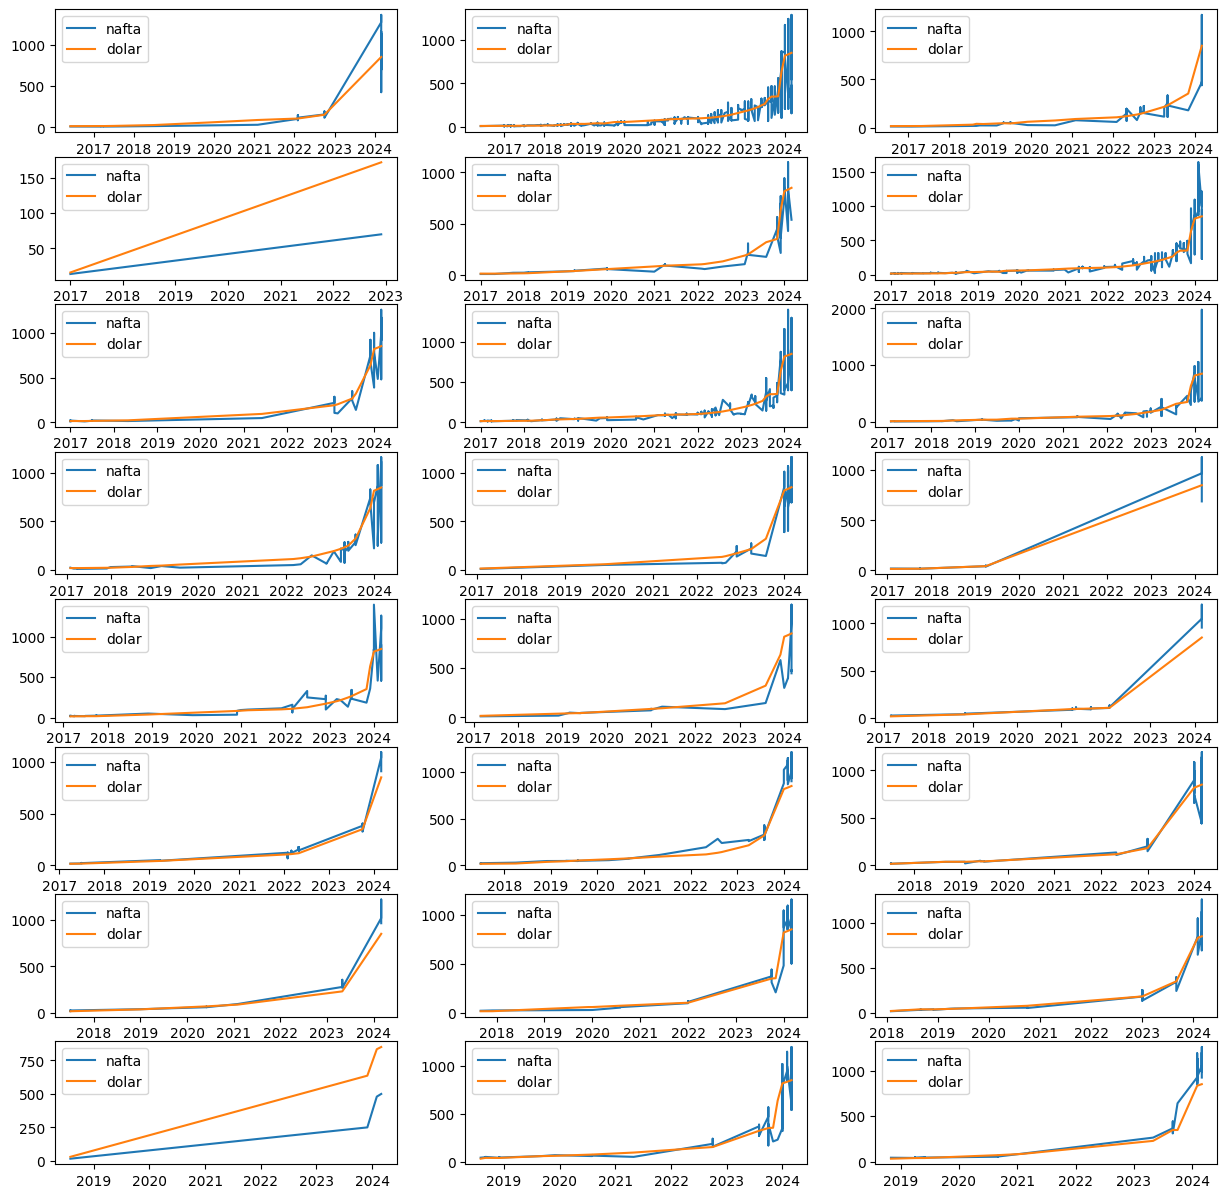

In [63]:
nrows= len(df_surtidores_dolar['provincia'].unique())//3
ncols= 3
col=0
fig,axes = plt.subplots(nrows=nrows,ncols=ncols,figsize=(15,15))




for index, provincia in enumerate(df_surtidores_dolar['provincia'].unique()):
    df = df_surtidores_dolar[df_surtidores_dolar['provincia']==provincia]
    row = index//3
    col = col
    df['indice_tiempo'] = df['indice_tiempo'].dt.to_timestamp()
    axes[row][col].plot(df['indice_tiempo'],df['precio'],label='nafta')
    axes[row][col].plot(df['indice_tiempo'],df['dolar_estadounidense'],label='dolar')
    axes[row][col].legend() 
    col= col+1
    if (col==3):
        col=0



In [64]:
df_test_bandera =df_surtidores_dolar.groupby(['idempresabandera'])[['indice_tiempo','dolar_estadounidense','precio']].mean()

df_test_bandera

,indice_tiempo,dolar_estadounidense,precio
idempresabandera,,,
-1,2017-03,15.523484,20.600000
1,2021-08,317.883783,329.433633
2,2021-08,374.992651,242.004925
4,2023-07,686.730662,647.983407
6,2022-08,349.331957,347.918558
8,2022-01,349.454587,375.533939
26,2023-02,567.849226,609.249144
28,2023-09,675.859416,687.625303
29,2023-11,725.865386,793.154417


Most of the columns seem to have complete data. We will see which we are going to use as feature to predict the total

/tmp/ipykernel_137463/3826762144.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['indice_tiempo'] = df['indice_tiempo'].dt.to_timestamp()


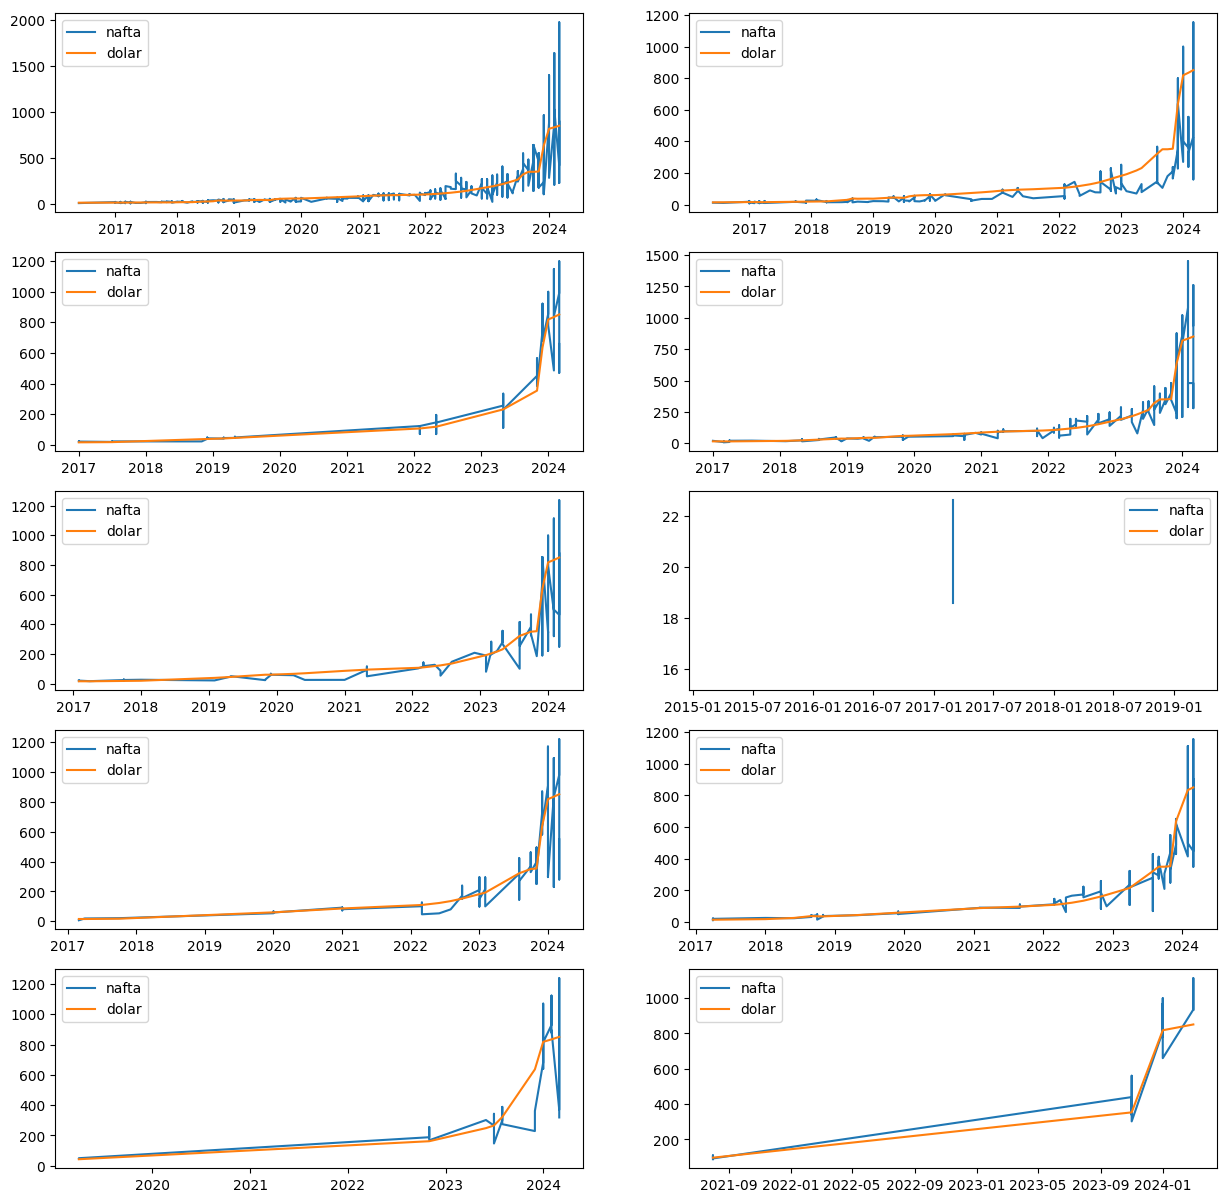

In [65]:
nrows= len(df_surtidores_dolar['idempresabandera'].unique())//2
ncols= 2
col=0
fig,axes = plt.subplots(nrows=nrows,ncols=ncols,figsize=(15,15))




for index, provincia in enumerate(df_surtidores_dolar['idempresabandera'].unique()):
    df = df_surtidores_dolar[df_surtidores_dolar['idempresabandera']==provincia]
    row = index//2
    col = col
    df['indice_tiempo'] = df['indice_tiempo'].dt.to_timestamp()
    axes[row][col].plot(df['indice_tiempo'],df['precio'],label='nafta')
    axes[row][col].plot(df['indice_tiempo'],df['dolar_estadounidense'],label='dolar')
    axes[row][col].legend() 
    col= col+1
    if (col==2):
        col=0



### Train and Test split

In [101]:
from sklearn.model_selection import train_test_split
X_data = df_surtidores_dolar[['dolar_estadounidense','provincia','idempresabandera','idproducto','idtipohorario']]
y_data = df_surtidores_dolar[['precio']]
X_train_preproc,X_test_preproc,y_train,y_test = train_test_split(X_data,y_data,test_size=0.2,random_state=42)

In [102]:
#Separating numerical and categorical features
train_num = X_train_preproc['dolar_estadounidense']
train_cat = X_train_preproc.drop(['dolar_estadounidense'],axis=1)

Preprocessing categorical values with OneHotEncoder

In [103]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
X_train_cat = cat_encoder.fit_transform(train_cat)
X_train_cat

<4738x41 sparse matrix of type '<class 'numpy.float64'>'
	with 18952 stored elements in Compressed Sparse Row format>

In [104]:
X_train_cat.toarray()

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

Definir la pipeline. Podremos ir desde los datos leídos hasta los dtos preparados de manera muy sencilla

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer



#If we had, we could algo add numerical pipeline and put all the pipelines together into the Column transformer
full_pipeline = ColumnTransformer([
    ("cat",OneHotEncoder(),list(train_cat.columns))#In this case we only have one step, but we coult add multiple
])

In [106]:
X_train = full_pipeline.fit_transform(X_train_preproc) #This X_train_processed it's a matrix oew
X_train

<4738x41 sparse matrix of type '<class 'numpy.float64'>'
	with 18952 stored elements in Compressed Sparse Row format>

Now we transform the test_data (of course without fitting, just transforming. If not, our pipeline would change)

In [107]:
X_test = full_pipeline.transform(X_test_preproc)
X_test

<1185x41 sparse matrix of type '<class 'numpy.float64'>'
	with 4740 stored elements in Compressed Sparse Row format>

## Models

### Cost functions
First let's create a function to calculate the mse of each model
MSE -> Mean squared error

In [148]:
from sklearn.metrics import mean_squared_error
import numpy as np
def mse(model):
    train_y_preds = model.predict(X_train)
    test_y_preds = model.predict(X_test)
    mse_train = mean_squared_error(y_pred=train_y_preds,y_true=y_train)
    mse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_pred=test_y_preds,y_true=y_test)
    mse_test = np.sqrt(mse_test)
    return mse_train,mse_test


## Linear regression

In [150]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
mse_train, mse_test = mse(model_lr)
print (f"mse_train: {mse_train}")
print (f"mse_test: {mse_test}")

mse_train: 351.4024242609387
mse_test: 351.1000411936859


## Decisions Tree



In [151]:
from sklearn.tree import DecisionTreeRegressor

model_tr = DecisionTreeRegressor()
model_tr.fit(X_train,y_train)
mse_train, mse_test = mse(model_tr)
print (f"mse_train: {mse_train}")
print (f"mse_test: {mse_test}")

mse_train: 318.2981903195572
mse_test: 371.0169518533733


## Random Forest

In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    # 12 (3x4) combinaciones
    {'n_estimators':[3,10,300],'max_features':[2,4,6,8,10,12]},
    {'bootstrap':[False],'n_estimators':[3,10,20],'max_features':[2,3,4]}
]

model_fr = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator = model_fr, param_grid=param_grid, cv= 5, scoring ='neg_mean_squared_error',return_train_score=True)
grid_search.fit(X_train,y_train.values.flatten())



GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8, 10, 12],
                          'n_estimators': [3, 10, 300]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10, 20]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [141]:

grid_search.best_params_

{'max_features': 12, 'n_estimators': 300}

In [142]:
model_rforesr =grid_search.best_estimator_

In [152]:
mse_train, mse_test = mse(model_rforesr)
print (f"mse_train: {mse_train}")
print (f"mse_test: {mse_test}")

mse_train: 319.03164434553855
mse_test: 362.26472039835505
